## An introduction to seaborn 

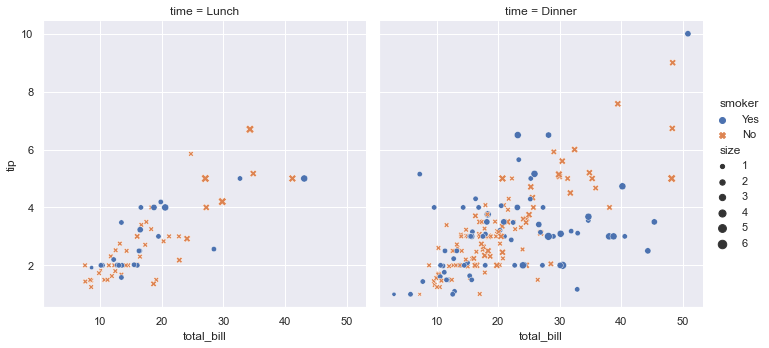

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

tips = sns.load_dataset("tips")
sns.relplot(
	data= tips,
    x = "total_bill", y="tip", col="time",
    hue = "smoker", style = "smoker", size = "size",
    )

## A high-level API for statistical graphics

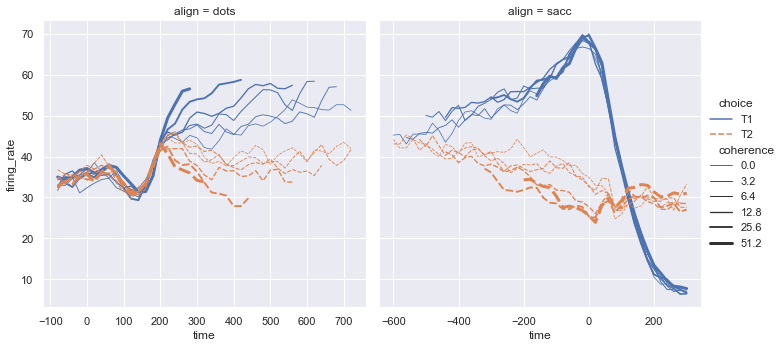

In [8]:
# 데이터를 시각화하는 가장 좋은 방법은 없다.
# seaborn은 일관된 데이터 세트 지향 API를 사용하여 다양한 시각적 표현 사이를 쉽게 전환할 수 있다.
# relplot() : 다양한 통계적 관계를 시각화하도록 설계
#   - relplot 함수 안에 kind 파라미터를 통해 그래프의 종류를 쉽게 바꿀 수 있다.
dots = sns.load_dataset("dots")
sns.relplot(
    data = dots, kind = "line",
    x = "time", y = "firing_rate", col = "align",
    hue = "choice", size = "coherence", style = "choice",
    facet_kws = dict(sharex=False),
)

# size와 style 파라미터는 scatter와 line plot 모두에서 쓰이지만, 시각화 효과는 다르다.
# scatter에서는 마커여역과 심볼을 바꾸고, line에서는 선의 너비와 그래프를 세련되게 만든다.
# 이런 디테일들을 기억하고 있을 필요는 없다, 전반적인 그래프의 구조와 우리가 원하는 정보에 집중해야한다.

### 통계 추정

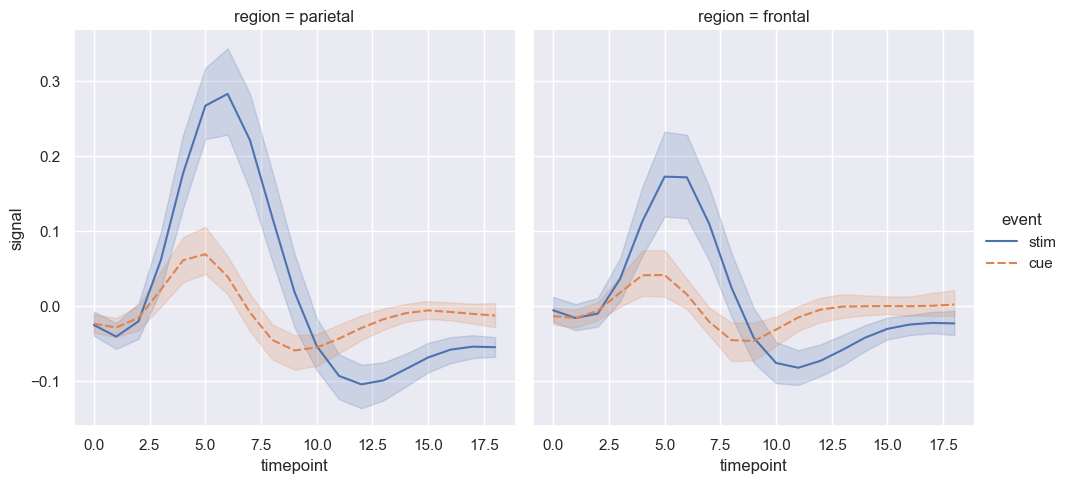

In [3]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data = fmri, kind = "line",
    x = "timepoint", y = "signal", col = "region",
    hue= "event", style ="event",
)

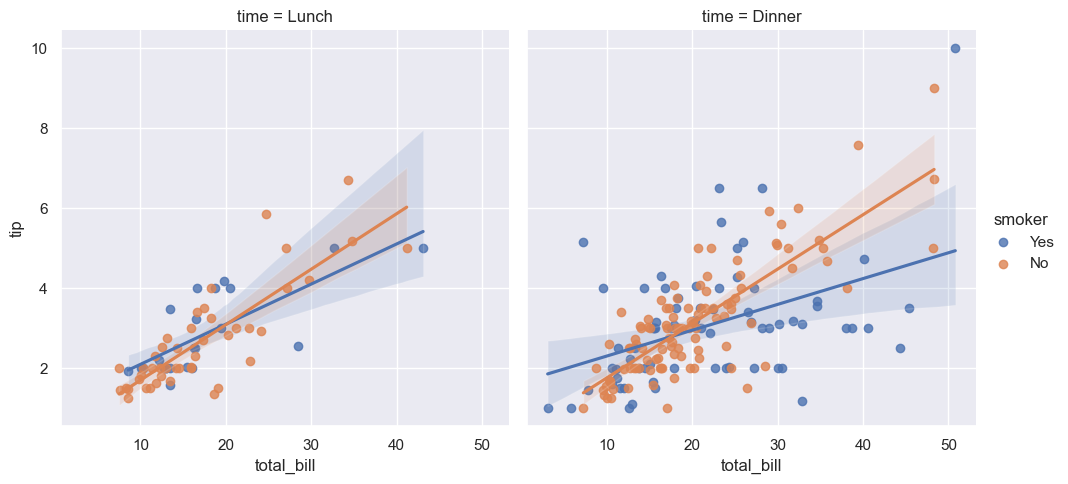

In [4]:
# 통계적 값이 추정될 때, seaborn은 부트스트랩을 사용하여 신뢰 구간을 계산하고 추정치의 불확실성을 나타내는 오류 막대를 그릴 것이다.
# seaborn의 통계적 추정은 서술적 통계를 넘어선다. 예를 들어, 선형 회귀 모델(및 불확실성)을 포함하여 산점도를 향상시킬 수 있습니다.

sns.lmplot(data=tips, x="total_bill", y= "tip", col = "time", hue = "smoker")

### 분포 표현

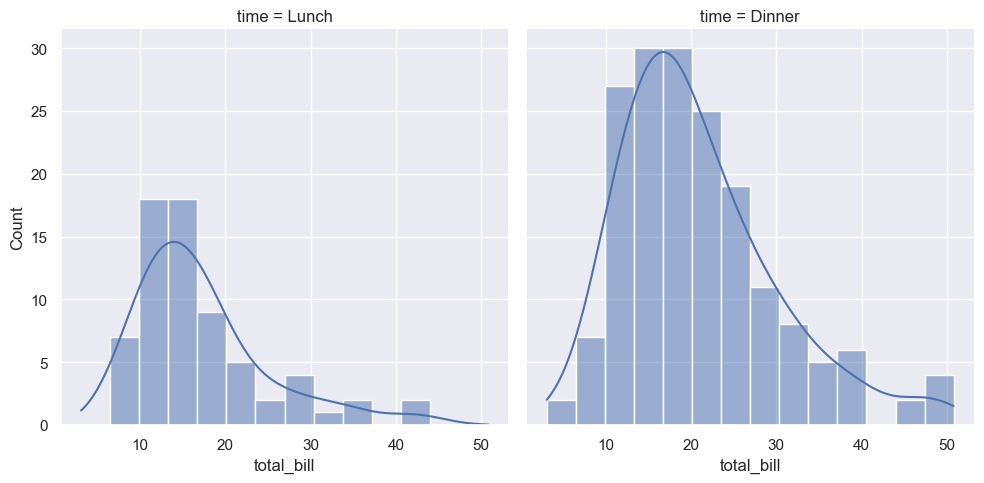

In [5]:
# 통계 분석은 데이터 세트의 변수 분포에 대한 지식이 필요
# seaborn 함수 displot()은 분포를 시각화하는 몇 가지 접근 방식을 지원
# 히스토그램과 같은 고전적인 기술과 커널 밀도 추정과 같은 계산 집약적인 접근 방식이 포함

sns.displot(data=tips, x="total_bill", col="time", kde=True)

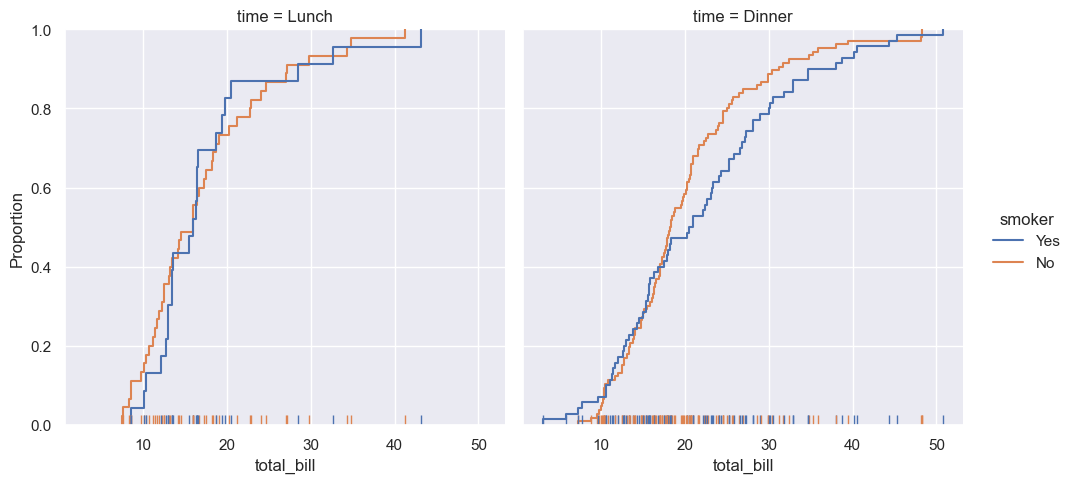

In [6]:
# Seaborn은 또한 데이터의 경험적 누적 분포 기능을 계산하고 플로팅하는 것과 같이 강력하지만 덜 친숙한 기술을 홍보하려고 한다.

sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

### 범주형 데이터 플롯

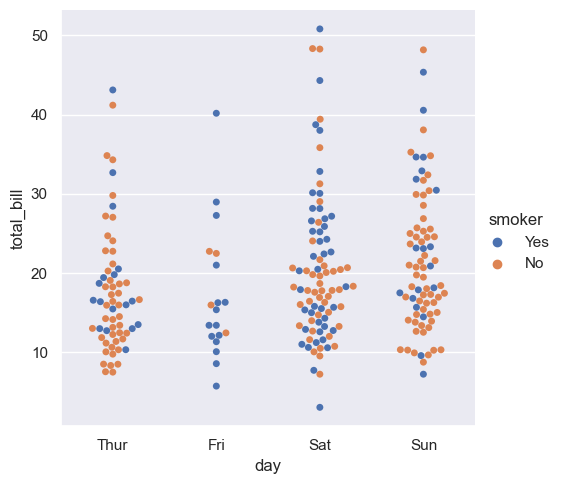

In [7]:
# seaborn의 몇 가지 전문 플롯 유형은 분류 데이터를 시각화하는 것을 지향
# => catplot() 을 통해 접근 가능
# 이 플롯들은 다양한 수준의 세분성을 제공
# swarm plot을 통해 모든 관찰을 할 수 있다 : 겹치지 않는 카테고리별 축을 기준으로 각각 산점도가 생긴다.

sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

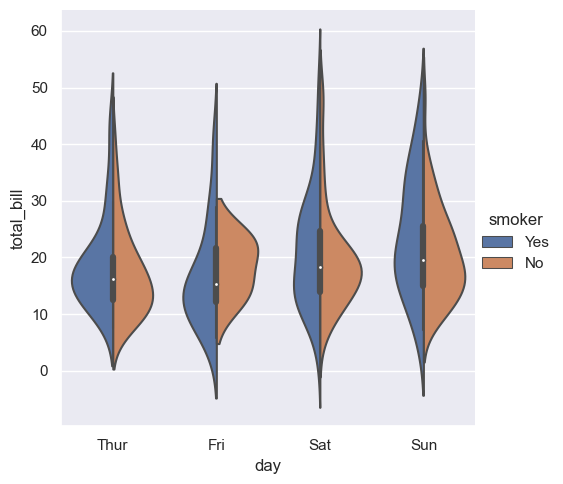

In [8]:
# 또는 커널 밀도 추정을 사용하여 포인트가 샘플링되는 기본 분포를 나타낼 수 있다.

sns.catplot(data = tips, kind = "violin", x = "day", y= "total_bill", hue="smoker", split= True)

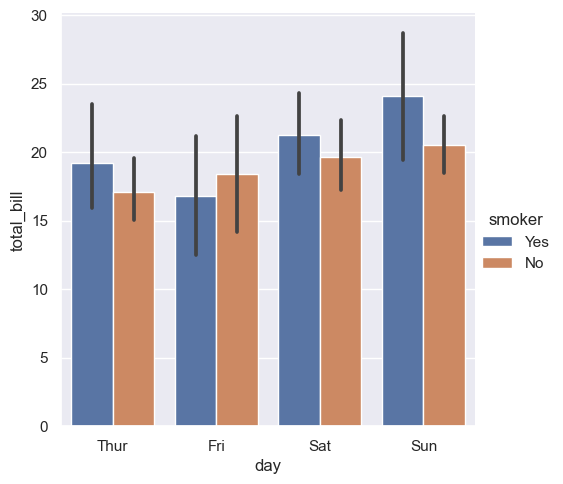

In [9]:
# 또는 각 중첩된 범주 내에서 평균값과 신뢰구간만 보여줄 수 있다.

sns.catplot(data=tips, kind = "bar", x="day", y="total_bill", hue = "smoker")

## Multivariate views on complex datasets

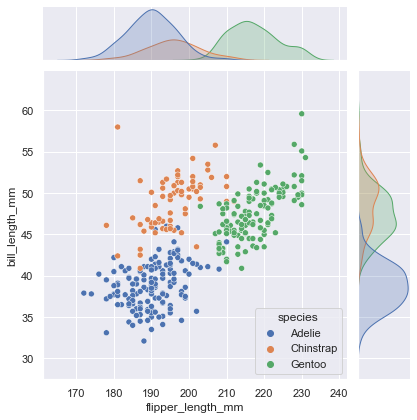

In [9]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data = penguins, x= "flipper_length_mm", y = "bill_length_mm", hue = "species")

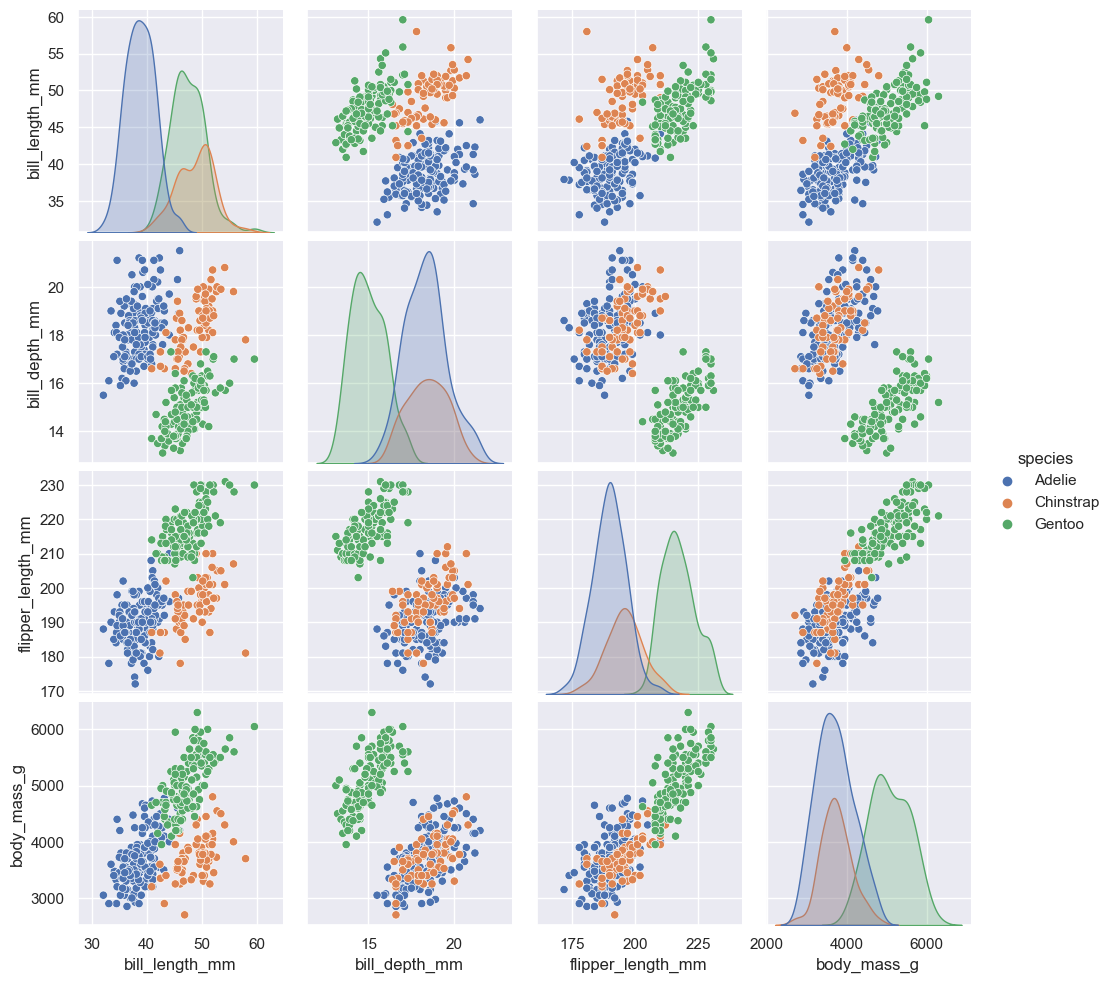

In [11]:
sns.pairplot(data=penguins, hue="species")

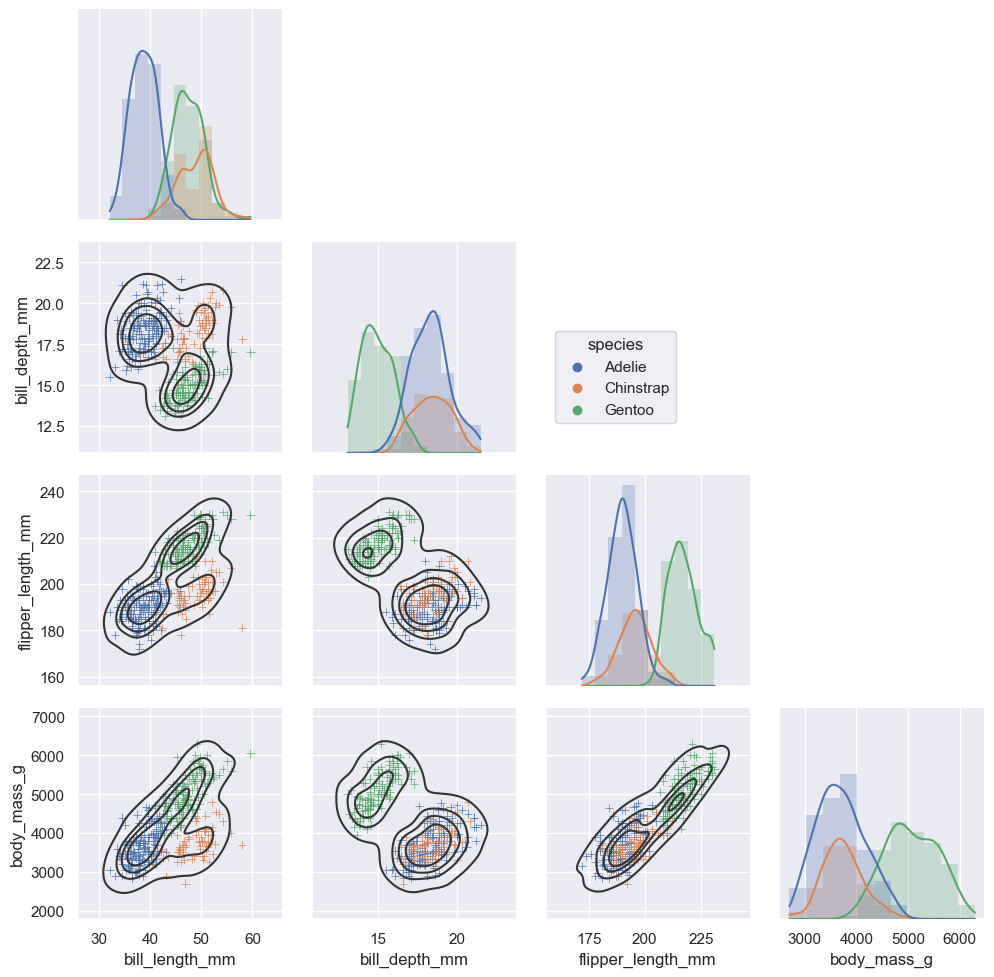

In [12]:
g = sns.PairGrid(penguins, hue = "species", corner = True)
g.map_lower(sns.kdeplot, hue = None, levels=5, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = "step", linewidth = 0, kde = True)
g.add_legend(frameon = True)
g.legend.set_bbox_to_anchor((.61, .6))

## Opinionated defaults and flexible customization

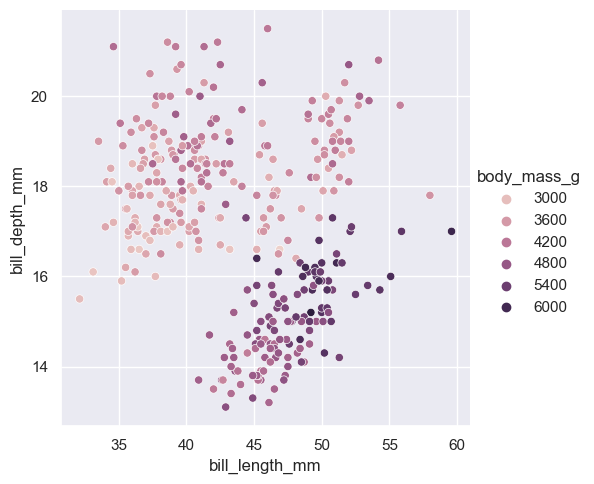

In [14]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

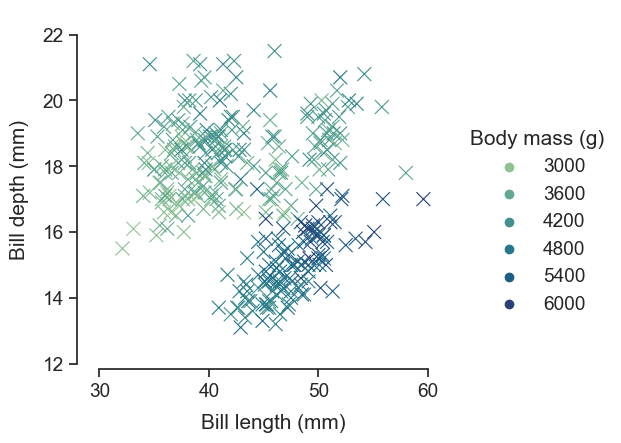

In [15]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

## Similar functions for similar tasks

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

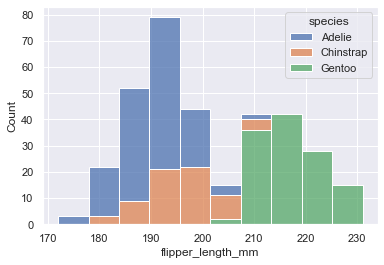

In [3]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

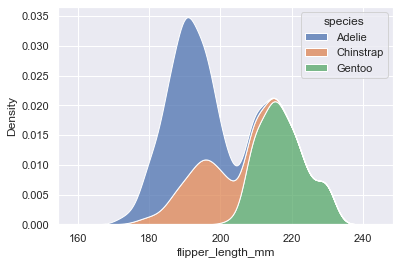

In [4]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

## Figure-level vs. axes-level functions

In [ ]:
# 시본 함수는 축 중심과 도표 중심의 함수로 나눌 수 있다.
# 축 중심 그래프는 matplotlib.pyplot.Axes 를 통해 표현하고, 그림 중심 그래프는 FaceGrid 통해 matplotlib와 인터페이스한다.

In [ ]:
# 예를들어 displot()은 분포 모듈의 그림 중심 함수이다. 그 중 histplot()이 있다.

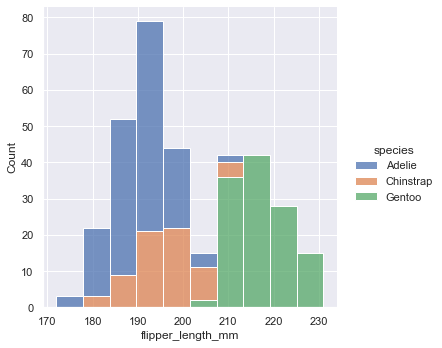

In [10]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

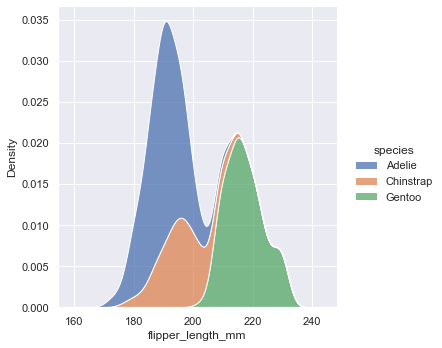

In [11]:
# 커널 밀도 그래프로 그리릴면, 같은 코드에서 kind 파라미더를 "kde"로 지정하면 된다.
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

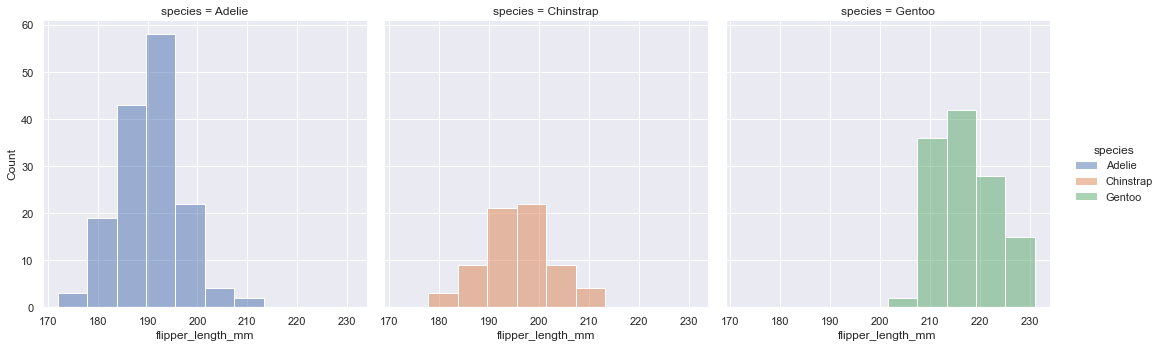

In [12]:
# 그림 중심의 플롯은 대부분 축 중심 플롯과 비슷해 보이지만, 몇 가지 차이점이 있다. 
# 그림 수준 함수가 제공하는 가장 융용한 기능은 여러 하위 플롯으로 그림을 쉽게 만드는 것이다 .
# 예를들어 평귄의 각 종에 대한 세가지 분포를 같은 축에 쌓는 대신, 열로 각각 나열하여 그릴 수 있다.
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

In [13]:
# 그림 중심 함수는 축 중심에 대응하여 히스토그램의 bin 크기 같은 아규먼트를 기본으로 제공한다.
# 이것은 그림 중심 함수가 덜 유연하지 않다는 것이다, 그러나 함수 sigature나 docstring에 써있는 않다는 것은 단점이다. 
# 

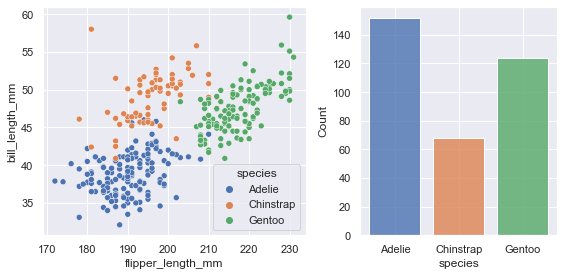

In [14]:
# 축 수준의 함수는 독립적인 플롯을 만든다

# 축 수준 함수는 matplotlib 함수의 드롭인 대체물처럼 작동하도록 작성되었다.
# 그들이 자동으로 축 라벨과 범례를 추가하는 동안, 그들이 그려진 축을 넘어서는 아무것도 수정하지 않는다.
# 그것은 그들이 예측 가능한 결과를 가진 임의로 복잡한 matplotlib 수치로 구성될 수 있다는 것을 의미한다.

# 축 레벨 함수 호출matplotlib.pyplot.gca() 내부적으로 matplotlib 상태-머신 인터페이스에 연결하여 "현재 활성" 축에 플롯을 그립니다. 
# 하지만 그들은 또한 객체 지향 인터페이스와 통합되고 각 플롯이 어디로 가야 하는지 정확히 지정할 수 있는 ax= 인수를 받아들인다.

f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

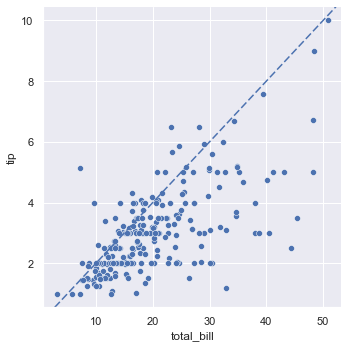

In [15]:
# 그림 수준의 함수는 그들의 그림을 소유한다.

# 대조적으로, 그림 수준의 함수는 다른 플롯으로 (쉽게) 구성될 수 없다. 
# 설계상, 그들은 초기화를 포함하여 자신의 그림을 "소유"하므로, 그림 수준의 함수를 사용하여 기존 축에 플롯을 그리는 개념이 없다. 
# 이 제약은 그림 수준의 함수가 범례를 플롯 외부에 두는 것과 같은 기능을 구현할 수 있게 해준다.

# 그럼에도 불구하고, 그들이 반환하는 객체의 matplotlib 축에 액세스하고 그런 식으로 플롯에 다른 요소를 추가하여 그림 수준 함수가 제공하는 것을 넘어설 수 있습니다.

tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

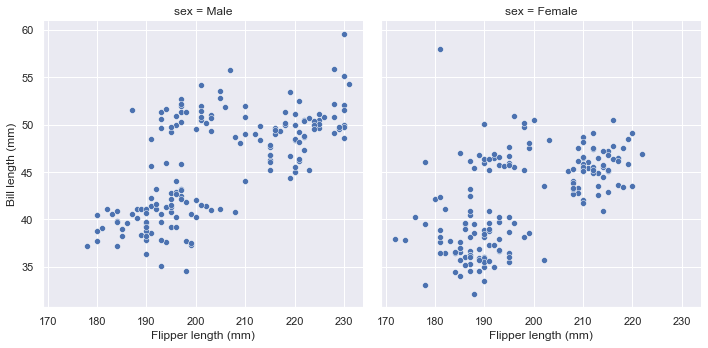

In [16]:
# 그림 레벨 함수에서 플롯 사용자 지정

# 그림 수준의 함수는 a를 반환한다FacetGrid 예를 들어, 하위 플롯 조직에 대해 "똑똑한" 방식으로 플롯의 속성을 사용자 정의하는 몇 가지 방법이 있습니다.
# 예를 들어, 한 줄의 코드를 사용하여 외부 축의 라벨을 변경할 수 있습니다:

g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

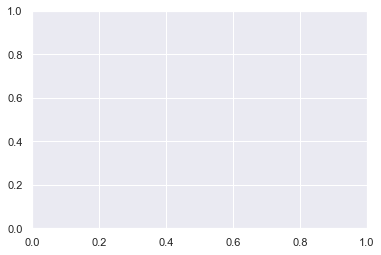

In [18]:
# 그림 크기 지정하기

# Matplotlib 플롯의 크기를 늘리거나 줄이려면 전역 rcParams에서 전체 그림의 너비와 높이를 설정하면서 플롯을 설정합니다(예: matplotlib.pyplot.subplots()의 figsize 매개 변수),
# 또는 그림 객체에서 메서드 호출(예: matplotlib.Figure.set_size_inches()

# 그림 수준의 기능을 사용할 때, 몇 가지 주요 차이점이 있다. 
# 첫째, 함수 자체는 그림 크기를 제어하는 매개 변수 가지고 있다 (비록 이것들은 실제로 기본 매개 변수이지만)그림을 관리하는 FacetGrid). 
# 둘째, 이러한 매개 변수, 높이 및 측면은 matplotlib의 너비, 높이 매개 변수화와 약간 다르게 크기를 매개 변수화합니다(바다에서 태어난 매개 변수 사용, 너비 = 높이 * 측면). 
# 가장 중요한 것은, 매개 변수가 전체 그림의 크기가 아니라 각 하위 플롯의 크기에 해당한다는 것이다.

# 이러한 접근 방식의 차이점을 설명하기 위해, 여기에 하나의 하위 플롯이 있는 matplotlib.pyplot.subplots()의 기본 출력이 있습니다.
f, ax = plt.subplots()

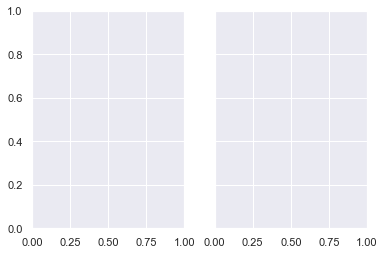

In [19]:
f, ax = plt.subplots(1, 2, sharey=True)

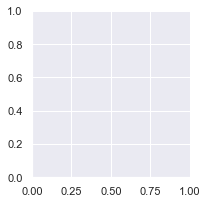

In [20]:
# 대조적으로, 그림 수준의 함수에 의해 생성된 플롯은 정사각형이 될 것이다. 
# 그것을 증명하기 위해, 사용하여 빈 플롯을 설정합시다.FacetGrid직접.
# 이것은 다음과 같은 기능의 무대 뒤에서 일어난다.relplot(),displot(), 또는catplot():

g = sns.FacetGrid(penguins)

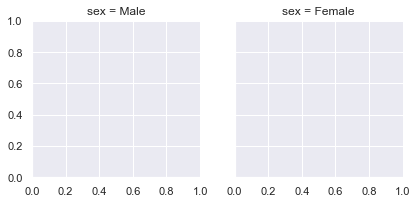

In [21]:
g = sns.FacetGrid(penguins, col="sex")

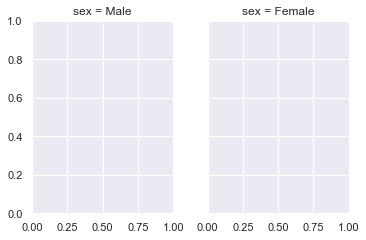

In [22]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

In [23]:
# 수치 수준의 함수의 상대적인 장점

# 다음은 우리가 위에서 논의한 장단점에 대한 요약입니다:

In [ ]:
# 균형적으로, 그림 수준의 기능은 초보자를 더 혼란스럽게 만들 수 있는 추가적인 복잡성을 추가하지만, 그들의 뚜렷한 기능은 그들에게 추가적인 힘을 준다. 
# 튜토리얼 문서는 약간 더 깨끗한 플롯을 생성하기 때문에 대부분 그림 수준의 기능을 사용하며, 
# 일반적으로 대부분의 응용 프로그램에 사용하는 것이 좋습니다. 
# 그들이 좋은 선택이 아닌 한 가지 상황은 여러 가지 다른 플롯 종류를 구성하는 복잡하고 독립적인 그림을 만들어야 할 때이다. 
# 이 시점에서, matplotlib을 직접 사용하여 그림을 설정하고 축 수준 함수를 사용하여 개별 구성 요소를 채우는 것이 좋습니다.